<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/69_oil_consumption_by_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

world_map = 'https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip'
dataset_source = 'https://www.worldometers.info/oil/oil-consumption-by-country'

dataset = (
    (
        gpd.read_file(world_map)
        .to_crs('EPSG:3857')
        .replace({'GEOUNIT':
         {'United States of America': 'United States',
          'Democratic Republic of the Congo': 'DR Congo',
          'The Bahamas': 'Bahamas',
          'Republic of the Congo': 'Congo',
          'Republic of Serbia': 'Serbia',
          'Palestine': 'State of Palestine',
          'Czechia': 'Czech Republic (Czechia)',
          'Ivory Coast': "Côte d'Ivoire",
         }})
    )
   .merge(pd.read_html(dataset_source)[0],
       left_on='GEOUNIT',
       right_on='Country',
       how='inner'
    )
   .assign(
       consumption=lambda df: pd.cut(
            df['Daily Oil Consumption (barrels)'],
            bins=[51, 35000, 111000, 2605000, 4443000, 19687287],
            labels=['51 - 35k', '35k - 111k', '111k - 2605k', '2605k - 4443k', '4443k - 19687k']
        )
    )
)

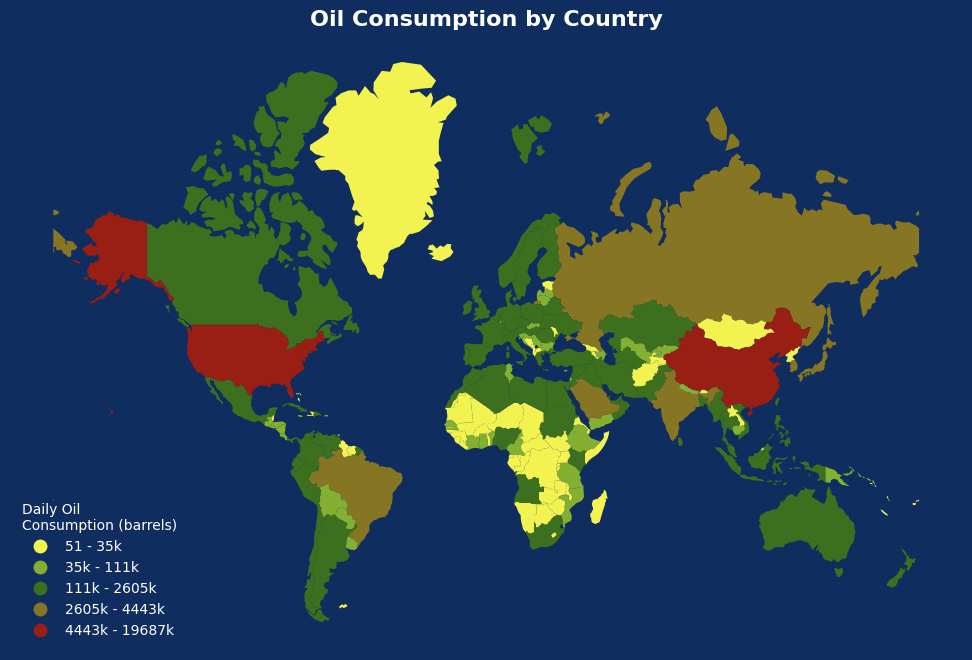

In [ ]:
color_codes = ['#F2F250', '#84B032', '#3C701E', '#867624', '#991E13']
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

dataset.plot(
    column='consumption',
    legend=True,
    legend_kwds={'loc': 'lower left'},
    cmap=colors.ListedColormap(color_codes),
    ax=ax,
)

ax.set_title('Oil Consumption by Country', color='white', fontweight='bold', fontsize=16)
fig.patch.set_facecolor('#0F2D5E')
leg = ax.get_legend()
leg.set_title('Daily Oil \nConsumption (barrels)')
leg.get_title().set_color('white')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')
for text in leg.get_texts():
    text.set_color('white')
plt.axis('off')
plt.savefig('consumption.png', bbox_inches='tight', dpi=600);